In [1]:
using Interact, Plots, DifferentialEquations
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

┌ Info: Precompiling NonLinearDynamicsCourse [6762868a-e78a-451a-a6ea-484381d56062]
└ @ Base loading.jl:1664


# Oscilador de Van der Pol
 
Partimos de vuelta de las ecuaciones del oscilador armonico simple

$\dot{x} = y$

$\dot{y} = -\mu y - kx  $
 
Recordamos que $y$ representa la velocidad del oscilador, $\dot{y}$ la aceleracion que es igual a la fuerza aplicada (suponemos masa igual a 1) que es lo que esta en el miembro derecho de la segunda ecuacion. En ese miembro $-kx$ representa la fuerza lineal elastica, mientras que $-\mu y$ es la friccion, una fuerza que siempre se opone a la velocidad ($\mu>0$) y que termina frenando el oscilador. En toda esta parte vamos a estudiar diferentes formas generales de esta **friccion** que de forma general vamos a ponerla como funcion de la posicion $x$ y la velocidad $y$:

$\dot{x} = y$

$\dot{y} = -F(x,y)y - kx  $

$Friccion$ $lineal$

$F(x,y)=\mu$



Es interesante ver que $\mu$ se puede ver tambien como una resistencia.
De hecho las ecuaciones anteriores describen tambien otro sistema fisico muy estudiado, el circuito RLC:

<div>
<img src="../files/RLC.jpg" width="500px">
</div>

Para el caso en serie $\mu = R/L$ $k=1/LC$ y la variable $y$ corresponde a la corriente que circula por el circuito ($x$ vendria a ser la carga del capacitor).

Nos podemos preguntar ahora que pasaria si usaramos una "resistencia negativa" para valores pequeños de corriente (en realidad estrictamente de carga). Lo que queremos es que el termino $-\mu y$ se invierta para valores de $x$ pequeños. 

Por que? Porque de esta forma podemos evitar que las oscilaciones "mueran". Si la amplitud de la oscilacion $x$ se hace muy chica (el sistema se frena por la friccion o la resistencia) aparece una fuerza que va **a favor** de la velocidad (o de la circulacion de corriente) inyectandole energia al sistema, sin embargo para amplitudes de oscilacion grandes gana la disipacion (resistencia) que frena el sistema. 

De esta forma se alcanza un equilibrio en el que se producen auto-oscilaciones que no se extinguen. Estas oscilaciones en el espacio de fases se conocen como **ciclos limite** y son conjuntos invariantes (atractores o repulsores) como los puntos fijos. Notar la diferencia con las oscilaciones y orbitas concentricas del oscilador armonico sin friccion. A diferencia de este ultimo las oscilaciones de relajacion (o los ciclos limite en general) son atractoras, es decir que cualquier condicion cercana termina convergiendo a ellas. 


Como podemos escribir esta inversion de la friccion para valores de $x$ cercanos a cero? 
La forma mas simple es usar una nolinealidad cuadratica. Una parabola hundida en el eje tiene valores negativos cerca del $x=0$ y positivos para valores grandes de $x$ (tanto positivos como negativos). Por lo tanto podemos reemplazar a la friccion lineal por $\mu(x^2-1)$ . La resistencia (o friccion) en funcion de la posicion del oscilador (o de la carga en el capacitor) seria:

$Friccion$ $Van$ $der$ $Pol$

$F(x,y) = \mu(x^2-1)$

Y el sistema de ecuaciones diferenciales queda escrito:

$\dot{x} = y$

$\dot{y} = \mu (1 -x^2)y - x  $

La parte 'negativa' de la resistencia es $+\mu y$, una fuerza que va **a favor** de la velocidad. Estamos asumiendo que $\mu>0$. Mientras que queda un termino $- \mu x^2 y$ que siempre se va a oponer a la velocidad y gana para amplitudes grandes.

La idea de una 'resistencia negativa' no es caprichosa, algunos elementos electronicos de base de semiconductor y valvulares se comportan de esa forma (son activos). De hecho Van der Pol dedujo sus ecuaciones a partir del estudio de un circuito amplificador con un elemento valvular (triodo) en 1927. El mismo efecto se puede observar en tubos de neon y otros elementos con descarga en gases.


<div>
<img src="../files/Neon1.PNG" width="300px">
</div>

Una version mas elaborada de este sistema dio lugar al desarrollo del famoso VODER en 1939:

<div>
<img src="../files/Voder.PNG" width="500px">
</div>


## Puntos fijos y estabilidad
Vamos a calcular los puntos fijos primero por el metodo de las nulclinas.

La primera nuclina es trivial, una recta horizontal $y=0$ con lo cual todos los puntos fijos van a estar sobre el eje $x$

La segunda nulclina es mas complicada escrita como $y$ en funcion de $x$:

$y = \Large\frac{1}{\mu}\frac{x}{1-x^2} $

pero el unico punto que esta en las dos curvas es $(0,0)$ que es el unico punto fijo. 

Calculamos la matriz jacobiana


$
\begin{pmatrix}
0 & 1\\
-1-2\mu xy & \mu(1-x^2)
\end{pmatrix}
$

que evaluada en el unico punto fijo da

$
\begin{pmatrix}
0 & 1\\
-1 & \mu
\end{pmatrix}
$

Es facil calcular $Tr=\mu$ y $\Delta=1$. El determinante es siempre positivo y la traza tiene el signo del parámetro $\mu$ uqe asumimos positivo

Cuando $\mu>0$ el origen se hace repulsor, pero globalmente el flujo es atractor, para valores grandes de $x$ y de $y$ la disipacion no lineal $-x^2y$ domina y actua como un atractor global. Por lo tanto se va a formar un **ciclo limite estable** en el medio. Veamos como son las nulclinas y el flujo.



In [2]:
#definimos la Ed para el oscilador de VanderPol
function vdp!(du,u,p,t)
    du[1] = u[2]
    du[2] = p[1]*(1.0-u[1]*u[1])*u[2]-u[1]
    du
end    

vdp! (generic function with 1 method)

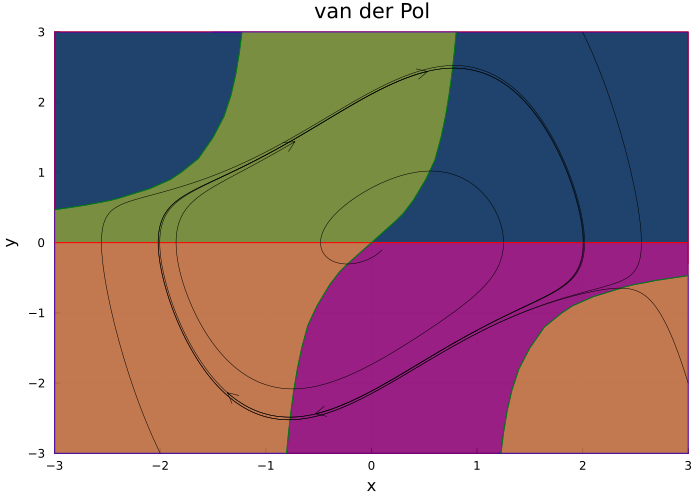

In [3]:
u0_arr=[[2.0;3.0],[-2.0;-3.0],[0.1;-0.1],[3.0;-2.0]]
flux2d_nullclines(vdp!,u0_arr,10.0,[0.8];xlims=[-3,3],ylims=[-3,3],title="van der Pol")

Notar como las ramas derecha e izquierda de la nulclina verde ($\dot{y}=0$) guian el flujo que cruza el eje horizontal ($\dot{x}=0$) hacia el ciclo límite.

In [4]:
@manipulate throttle=0.5 for xini=-1:0.1:2.0, yini=-1:0.1:1,μ=0.0:0.01:10,tmax=0:1.0:200.0
    #flux2d_nullclines(vdp!,[xini;yini],50.0,[μ];xlims=[-3,3],ylims=[-4,4])
    sol=solve(ODEProblem(vdp!,[xini;yini],(0,tmax),[μ]))
    p1=plot(sol,vars=(0,1),xlabel="t",ylabel="x")
    p2=plot(sol,vars=(1,2),legend=false,xlabel="x",ylabel="y")
    scatter!(p2,[sol.u[1][1]],[sol.u[2][1]])
    plot(p1,p2,layout=(1,2),size=(700,300),fmt=:png,title="van der Pol")
end   

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 31, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
16, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000083cb6100, Task (runnable) @0x0000000083cb6100), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\"

Con la funcion `flux2d_animated` podemos hacer un gif animado de la evolucion del sistema. Recibe como argumentos:
- la funcion del campo vector
- el vector de parametros 
- la cantidad total de frames
- el paso temporal entre frames

Y como argumentos opcionales:
- Ngrid la cantidad de puntos de la grilla de condiciones iniciales (default Ngrid=10)
- fps (default fps=15) la cantidad de frames por segundo del gif
- xlmis,ylims los limites del grafico
- nullclines (default false) si agrega las nulclinas al grafico.
- fname (default empty) nombre del gif, por defecto le da el nombre de la funcion y el fps


Saving animation ...

┌ Info: Saved animation to 
│   fn = C:\Users\Camilo\NonLinearDynamicsCourse\Lectures\Part_II\vdp_fps_15.gif
└ @ Plots C:\Users\Camilo\.julia\packages\Plots\AAjgN\src\animation.jl:139


Plots.AnimatedGif("C:\\Users\\Camilo\\NonLinearDynamicsCourse\\Lectures\\Part_II\\vdp_fps_15.gif")
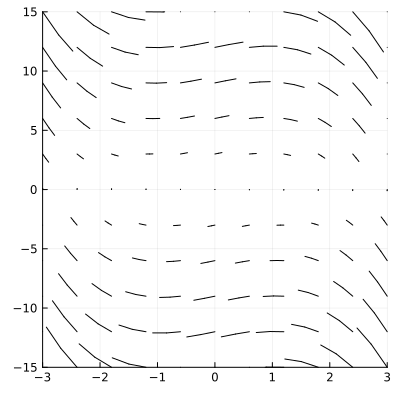

In [5]:
flux2d_animated(vdp!,[1.0],100,0.02;Ngrid=10,xlims=[-3,3],ylims=[-15,15])

## Osciladores de relajacion. Transformacion de Lienard

A diferencia de los puntos fijos no hay un método general para establecer la existencia de ciclos límites, es decir de órbitas cerradas **aisladas** que funcionan como conjunto atractor (o repulsor). Existen criterios que por lo general son difíciles de aplicar y muy frecuentemente la existencia de ciclos se puede presuponer a partir del análisis del flujo global o a través de ciertas transformaciones de coordenadas. 

Vamos a ver un ejemplo para el oscilador de van der Pol para el caso en el que el parámetro $\mu$ tiene un valor alto. En ese caso el sistema se aproxima al comportamiento de un **oscilador de relajación**. Los osciladores de relajación surgen de la alternancia entre un proceso lento de carga y uno rápido de descarga (por ejemplo los picos en el comportamiento eléctrico de las neuronas) y suceden en dos escalas temporales diferentes. Si se puede hacer un cambio de coordenadas de forma tal que esas dos escalas de tiempo estén separadas en las nuevas variables (es decir que tengamos una variable "rápida" y otra "lenta") el ciclo límite va a formarse por una trayectoria que salta (o relaja) en la variable rápida de una rama a otra de la nulclina sobre la que se arrastra siguiendo la ecuación de la variable lenta.

En el caso del oscilador de van der Pol se puede hacer un cambio de coordenadas no lineal (sin meternos en los detalles ) que transforma la forma anterior a una oscilador de relajación con variables rápida $(x_1)$ y lenta $(x_2)$. El cambio es el siguiente:

$x_1 = \mu^{-1/2}x$

$y_1 = \mu^{-3/2}(\mu x - x^3/3 -y)$

En las nuevas variables el sistema queda escrito como 

$\dot{x_1} = \mu(x_1-x_1^3/3-y_1)$

$\dot{y_1} = x_1/\mu$

como antes el unico punto fijo esta en $(0,0)$ pero la primera nulclina se puede escribir como una cubica que tiene siempre forma de "N":

$y_1 = x_1 - x_1^2/3$

y la otra es una recta vertical en $x_1=0$

Pero lo interesante pasa cuando $\mu$ es grande. Como esta dividiendo a la variacion de $y_1$ y multiplicando a la variacion de $x_1$, podemos imaginar que el flujo va a ser mucho mas rapido en la direccion horizontal $\dot{x_1}>>\dot{x_2}$, salvo cuando se aproxima a la nulclina en forma de "N" (porque ahi se hace $\dot{x_1}=1$). 
Entonces tenemos un flujo rapido horizontal que va a parar a la nulclina en forma de "N". 

Toda la zona que esta arriba de la N ($y_1>x_1-x_1^3/3$ hace $\dot{x_1}$ sea negativo) fluye hacia la izquierda y lo que esta abajo de la N ($y_1<x_1-x_1^3/3$ hace $\dot{x_1}$ sea positivo) fluye a la derecha.

Esto hace que en terminos del flujo horizontal la parte del medio de la N sea inestable (el flujo se aleja de ella) y las ramas de los costados sean estables (el flujo es atraido hacia ellas)

Una vez que la trayectoria esta cerca de la nulclina N va a fluir lentamente siguiendo el signo de $x_1$: hacia abajo a la izquierda del eje vertical y hacia arriba a la derecha del eje. 

Cuando la orbita llega al "codo" de la N se encuentra con la rama inestable de la nulclina y 'salta' (relaja) a la otra rama estable. Esto es lo que se conoce como un oscilador de relajacion.

Atencion porque esta forma sirve para ver mejor el ciclo limite pero por la transformacion de coorenadas la bifurcacion de Hopf es 'degenerada' ($\mu=0$ implicaria ademas que $\dot{y_1}$ se hiciese infinito).

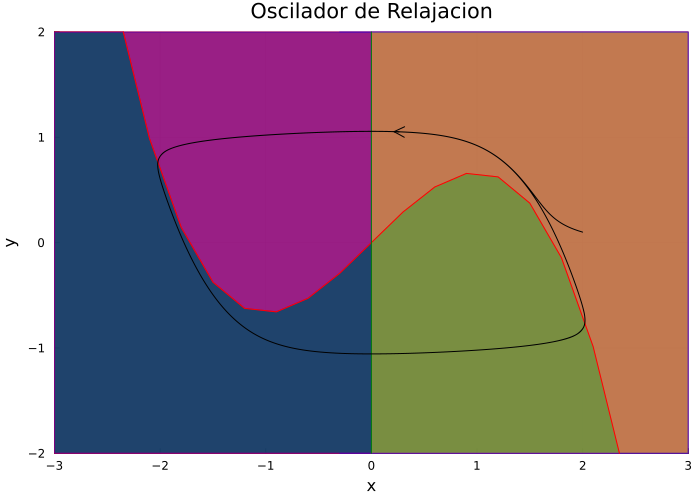

In [6]:
#definimos la Ed para el oscilador de VanderPol en la version de Lienard (oscilador de relajacion)
function lienard!(du,u,p,t)
    du[1] = p[1]*(u[1]*(1.0-u[1]*u[1]/3.0)-u[2])
    du[2] = u[1]/p[1]
end    

flux2d_nullclines(lienard!,[2.0;0.1],20.0,[3.0],xlims=[-3,3],ylims=[-2,2],title="Oscilador de Relajacion")

In [7]:
@manipulate throttle=0.5 for xini=-1:0.1:2.0, yini=-1:0.1:1,μ=0.0:0.01:10,tmax=0:1.0:200.0
    #flux2d_nullclines(vdp!,[xini;yini],50.0,[μ];xlims=[-3,3],ylims=[-4,4])
    sol=solve(ODEProblem(lienard!,[xini;yini],(0,tmax),[μ]))
    p1=plot(sol,vars=(0,1),xlabel="t",ylabel="x")
    p2=plot(sol,vars=(1,2),legend=false,xlabel="x",ylabel="y")
    plot(p1,p2,layout=(1,2),size=(700,300),fmt=:png,title="Oscilador de Relajacion")
end   

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 31, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
16, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000009e5443f0, Task (runnable) @0x000000009e5443f0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\"

In [8]:
@manipulate throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,μ=1.0:0.1:10.0
    flux2d_nullclines(lienard!,[xini;yini],50.0,[μ];xlims=[-3,3],ylims=[-2,2],title="Oscilador de Relajacion")
end   

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000083c72100, Task (runnable) @0x0000000083c72100), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

# Auto-Oscilador de Rayleigh. Lengueta. 

El oscilador de van der Pol lo habiamos presentado como el auto-oscilador con 'friccion negativa' mas simple posible porque la no linealidad era cuadratica y estaba solo en la variable $x$. Esa dependencia de la resistencia en $x$ aparecia de forma natural en circuitos valulares (tristores) y lo presentamos por motivos historicos.

Pero la no linealidad que da una zona de friccion negativa puede ser una funcion de la velocidad $y$ en lugar de $x$. De hecho esta forma aparece naturalmente cuando la fuerza que da impulso al oscilador cuando tiene poca amplitud es de origen aerodinamico. Entonces en su forma mas simple, con una no linealidad cuadratica podemos proponer la friccion no lineal.

$Friccion$ $Rayleigh$

$C(x,y)=y^2-\mu$

Comparar con la friccion de Van der Pol del principio. Esta forma la llamamos de Rayleigh porque es quien en su Teoria del Sonido en 1865 propone este modelo para la oscilacion de una lengueta de clarinete:

$\dot{x} = y $

$\dot{y} = -(y^2-\mu)y-kx$

donde $k$ determina la frecuencia de oscilacion. El sistema anterior se puede escribir entonces, distribuyendo los dos terminos de la fraccion:

$\dot{x} = y $

$\dot{y} = \mu y-y^3-kx$

De forma analoga que en el modelo de Van der Pol el termino $y^3$ representa la friccion no lineal que atenua las oscilaciones para amplitudes grandes y $\mu y$ es la 'friccion negativa' que actua para valores pequeños de $y$ como fuerza restitutiva y representa la accion del clarinetista generando una inestabilidad con el flujo del aire contra la lengueta.

El calculo de las nulclinas los puntos fijos y la estabilidad de los mismo queda para la practica. Pero se puede notar al jugar con los parametros que surge un ciclo límite estable al igual que en el Van der Pol. Para que valor de $\mu$?

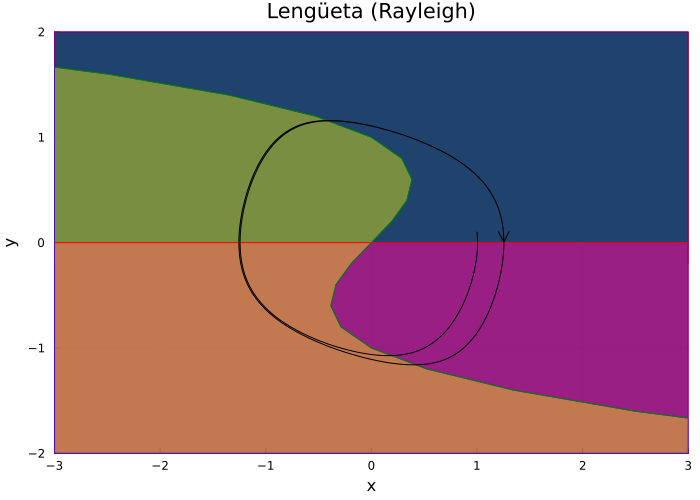

In [9]:
# Escribimos la ecuacion de la lengueta
function reed!(du,u,p,t)
    (μ,k) = p
    du[1] = u[2]
    du[2] = u[2]*(μ-u[2]*u[2])-k*u[1]
    du
end    

flux2d_nullclines(reed!,[1.0;0.1],20.0,[1.0,1.0],xlims=[-3,3],ylims=[-2,2],title="Lengüeta (Rayleigh)")

In [10]:
@manipulate throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,μ=-1.0:0.01:10.0
    flux2d_nullclines(reed!,[xini;yini],50.0,[μ,1.0];xlims=[-10,10],ylims=[-5,5],title="Lengüeta (Rayleigh)")
end   

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000827adb30, Task (runnable) @0x00000000827adb30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

In [11]:
@manipulate throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,tmax=10:1:100,μ=-1.0:0.01:1.0, k=0.1:0.1:1.0
    sol = solve(ODEProblem(reed!, [xini; yini], (0, tmax), [μ,k]));
    p1 = plot(sol)
    p2 = plot(sol,vars=(1,2),arrow=true,xlabel="x",ylabel="y")
    plot(p1,p2,layout=(1,2),size = (900,450),title="Lengüeta")
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000082098da0, Task (runnable) @0x0000000082098da0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

# Oscilador Frotado (violin puntual)

Otro sistema con auto-oscilaciones simples fue propuesto (tambien por Rayleigh en 1877!) para modelar la accion de **slip & stick** del arco contra la cuerda del violin, pero se puede aplicar a un monton de sistemas que generan autooscilaciones a partir de la friccion.

<div>
<img src="../files/Conveyor.PNG" width="300px">
</div>


El modelo propuesto era similar al de la figura. Una masa unida a un resorte esta apoyada sobre una cinta transportadora con friccion que se mueve con velocidad constante hacia la derecga. Al principio el rozamiento estatico hace que la masa este adherida (momento **stick**) a la cinta y ejerce una fuerza que iguala a la del resorte. Pero la friccion estatica tiene un valor maximo y cuando el resorte esta muy estirado no puede superar la fuerza elastica y la masa es arrastrada por el resorte y desliza con rozamiento dinamico sobre la cinta hacia la izquierda (momento **slip**) y puede llegar por inercia incluso a comprimir un poco el resorte hasta que la masa se frena y queda enganchada de vuelta por el rozamiento estatico y se repite el proceso.

Si bien se trata de un sistema simple, la forma funcional de la friccion (que tiene que ser funcion de la diferencia de velocidad entre la masa y la cinta es decir si desliza o no) no puede ser algo tan simple como una cuadratica o una cubica porque tiene que cambiar de signo bruscamente, ya que la friccion tiene que ser maxima para deslizamientos bajos e ir decreciendo para deslizamientos mas rapidos. La forma clasica es algo asi:

<div>
<img src="../files/Friction.PNG" width="300px">
</div>

donde $\dot{x}-v$ es el 'deslizamiento', es decir la diferencia de velocidades entre la masa y la cinta. Cuando la masa esta adherida a la cinta $C$ puede tomar todos los valores en la vertical hasta un valor maximo hacia un lado y hacia el otro y luego 'salta' al rozamiento dinamico que es menor a medida que el deslizamiento es mas cada vez rapido.

La forma funcional que esta representada arriba para el desplazamiento $d=\dot{x}-v$  es:

$C(d)=sign(d) e^{-2|d|}$

Ese salto brusco de la funcion signo trae problemas numericos, lo regularizamos con la funcion arco tangente del desplazamiento dividido por un numero pequeño. el arcotangente es un escalon mas suave que el signo (si el valor se hace muy pequeño se va haciendo cada vez mas parecido a la funcion signo).

$C_{bow}(d)=arctan(d/\epsilon) e^{-2|d|}$

Con todos estos elementos la friccion del Arco propuesta por Rayleigh y el sistema final queda escrito

$\dot{x}=y$

$\dot{y}=-\mu C_{bow}(y-v) -x$


In [12]:
ϵ = 0.05
friction(x) = atan(x/ϵ)*exp(-2*abs(x))

function bow!(du,u,p,t)
    du[1]=u[2]
    du[2]=-p[1]*friction(u[2]-p[2])-u[1]
    du
end    

bow! (generic function with 1 method)

In [13]:
@manipulate  throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,tmax=10:1:100,μ=0.0:0.01:1.0,v=-1.0:0.01:1.0
    flux2d_nullclines(bow!,[xini;yini],50.0,[μ,v];xlims=[-3,3],ylims=[-2,2],title="Cuerda Frotada")
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000083bef460, Task (runnable) @0x0000000083bef460), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

In [14]:
@manipulate throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,tmax=10:1:100,μ=0.0:0.01:1.0,v=-1.0:0.01:1.0
    sol = solve(ODEProblem(bow!, [xini; yini], (0, tmax), [μ,v]));
    p1 = plot(sol)
    p2 = plot(sol,vars=(1,2),arrow=true)
    plot(p1,p2,layout=(1,2),size = (900,450),title="Cuerda Frotada")
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008457a4e0, Task (runnable) @0x000000008457a4e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

## Auto Osciladores en flujos hidrodinamicos y elastodinamicos

Las auto-oscilaciones apararecen de forma espontanea en sistemas mas complejos, extensos y con delay (ambas cosas llevan a un sistema de $\infty$ ecuaciones diferenciales) en fluidos, como el flutter responsable del temblor de las alas y aletas y el flujo oscilatorio que pasa un obstaculo para una velocidad de fluido suficientemente alta, dando lugar a los vortices de von Karman.

<div>
<img src="../files/Vortex-street-animation.gif" width="500px">
</div>

Puede verse a partir de las ecuaciones de los fluidos (Navier Stokes) que estas auto-oscilaciones se originan a partir de una bifurcacion de Hopf

# Oscilador de Duffing van der Pol

En todos los osciladores anteriores la fuerza de restitucion era lineal, pero podemos considerar osciladores de forma mas general como:

$\dot{x} = y$

$\dot{y} = -C(x,y)y - K(x)$

en el caso del oscilador armonico $C(x,y)=c$ y $K(x)=kx$. En el oscilador de Van der Pol y en de Rayleigh cambia la forma de $C(x,y)$ pero la restitucion sigue siendo lineal. 

El oscilador de Duffing propone una fuerza de restitucion cubica: $K(x)=x^3-\beta x$.

Podemos combinar la restitucion cubica de Duffing con la friccion negativa de Van der Pol para tener un auto-oscilador no lineal con mas variedad de comportamiento. Tenemos entondes el modelo de Duffing-Van der Pol:

$\dot{x} = y$

$\dot{y} = \mu y -x^2y +\beta x - x^3$


In [15]:
#definimos la Ed para el oscilador de Duffing-VanderPol
function duffing_vanderpol!(du,u,p,t)
    du[1] = u[2]
    du[2] = (p[1]-u[1]*u[1])*u[2]+u[1]*(p[2]-u[1]*u[1])
    du
end    

duffing_vanderpol! (generic function with 1 method)

In [16]:
@manipulate  throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,tmax=10:1:100,μ=0.0:0.01:1.0,β=-1.0:0.01:1.0
    flux2d_nullclines(duffing_vanderpol!,[xini;yini],50.0,[μ,β];
        npts=41,xlims=[-3,3],ylims=[-2,2],title="Duffing van der Pol")
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000839309c0, Task (runnable) @0x00000000839309c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

In [17]:
@manipulate throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,tmax=10:1:100,μ=0.0:0.01:1.0,β=-1.0:0.01:1.0
    sol = solve(ODEProblem(duffing_vanderpol!, [xini; yini], (0, tmax), [μ,β]));
    p1 = plot(sol)
    p2 = plot(sol,vars=(1,2),arrow=true)
    plot(p1,p2,layout=(1,2),size = (900,450),title="Duffing van der Pol")
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000845adf10, Task (runnable) @0x00000000845adf10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

# FitzHugh Nagumo

Otro Auto Oscilador famoso y que funciona como modelo mas simple (continuo) de una neurona biologica es el sistema de FitzHugh-Nagumo que puede escribirse como:

$\dot{x} = x-\Large\frac{x^3}{3}\normalsize-y + I$

$\dot{y} = (ax +b -y)/\mu$

Donde hay dos parametros  ($a$,$b$) que caracterizan la excitabilidad de la neurona, $\mu$ es la diferencia de escala temporal entre el flujo lento/rapido y la vamos a fijar en 10, y una corriente sinaptica externa $I$. El estudio de los puntos fijos y las bifurcaciones queda para la practica. 

Notar que para el caso $a=0$, $b=0$ el sistema se reduce al oscilador de Van der Pol (en la forma de Lienard)

In [18]:
#definimos la Ed para la Neurona de FitzHugh Nagumo
function fhn!(du,u,p,t)
    (a,b,I)=p
    du[1] = u[1]*(1.0-u[1]*u[1]/3.0)-u[2]+I
    du[2] = (a*u[1]+b-u[2])/10.0
    du
end    

fhn! (generic function with 1 method)

In [19]:
@manipulate  throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,tmax=10:1.0:100,a=0.0:0.01:2.0,b=0.0:0.01:1.0,I=0:0.01:1.0
    flux2d_nullclines(fhn!,[xini;yini],tmax,[a,b,I];xlims=[-3,3],ylims=[-2,2],title="FitzHugh Nagumo")
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000009f967e10, Task (runnable) @0x000000009f967e10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

In [20]:
@manipulate throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,tmax=10:1:300,a=0.0:0.01:1.0,b=0.0:0.01:1.0,I=0:0.01:1.0
    sol = solve(ODEProblem(fhn!, [xini; yini], (0, tmax), [a,b,I]));
    p1 = plot(sol)
    p2 = plot(sol,vars=(1,2),arrow=true)
    plot(p1,p2,layout=(1,2),size = (900,450),title="FitzHugh Nagumo")
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000083b97650, Task (runnable) @0x0000000083b97650), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na